## 그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용,결합)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
print('승객수:',len(df))
display(df)

승객수: 891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [20]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

### df.groupby

In [28]:
grouped = df.groupby(['class'])
# list(grouped)
for key,group in grouped:
    print(' * key:',key)
    print(' * number:',len(group))
    print(group)

 * key: First
 * number: 216
      age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
 * key: Second
 * number: 184
      age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24

#### mean, max

In [30]:
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [31]:
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [35]:
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


### get_group

In [54]:
group2 = grouped.get_group('First')
group2.describe()

,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


In [53]:
group1 = grouped.get_group('First')
group1.describe()

,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


### describe (통계요약표)

In [52]:
# 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요
group3 = grouped.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [62]:
# class열 ,sex열을 기준으로 분할아여 grouped_two에 저장
df
grouped_two=df.groupby(['class','sex'])
for key,value in grouped_two:
    print('* key :',key)
    print('* num :',len(grouped_two))
    print(value.head())

* key : ('First', 'female')
* num : 6
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key : ('First', 'male')
* num : 6
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key : ('Second', 'female')
* num : 6
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key : ('Second', 'male')
* num : 6
     age   sex   class  fare  survived
17   NaN  male  Second  13.0   

In [63]:
averager_two=grouped_two.mean()
averager_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [68]:
# third 
group3f=grouped_two.get_group(('Third','female'))
group3f

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


In [74]:
group3f[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


## 적용-결합
데이터 집계(agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3....])
- 각 열마다 다른 함수를 매핑 : group객체.agg({'열1':함수1,'열2':함수2...}) 

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링 : group객체.filter(조건 함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑, 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

In [105]:
# (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.

### agg

In [110]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped=df.groupby(['class'])
# display(grouped.agg(minmax))
display(grouped.agg([min,max]))
# display(grouped.agg(min))
agg_all=grouped.agg([min,max])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [115]:
agg_all=grouped.agg([min,max])
agg_all

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [117]:
display(grouped.agg({'age':mean,'fare':[min,max]}))

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

### filter

In [172]:
#데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행을 출력하세요
grouped.filter(lambda x:len(x)>=200)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
885,39.0,female,Third,29.1250,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [191]:
#age열의 평균이 30보다 작은 그훕만을 필터링하여 데이터프레임으로 반환하여 age_filter이름으로 저장 후 끝에서 5개행 출력
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


In [220]:
#각 그룹의 통계요약표를 집계하세요.
# for key, group in grouped:
#     display(key, group.describe())
agg_grouped=grouped.apply(lambda x : x.describe())
# agg_grouped.age

In [215]:
#평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 사용자 함수를 작성하세요
def z_score(x):
    return (x- x.mean())/x.std()

### transform

In [226]:
#위에서 구한 사용자 함수를 이용하여 age칼럼을 transform함수로 변환하세요
grouped.age.transform(z_score)

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [229]:
list(grouped)

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

### apply

In [264]:
#위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply() 함수로 매핑하여 출력하세요.
grouped.age.apply(z_score)
grouped[['age']].apply(lambda x : z_score(x))


,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [ ]:
df2=df1.mean()


In [ ]:
#class 값이 First인 행을 선택하여 출력하세요
df2.loc['First']

In [6]:
#class 값이 first이고 sex값이 female인 행을 선택하여 출력하세요.
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [3]:
df1 = df.groupby(['class','sex'])
type(df1)


pandas.core.groupby.generic.DataFrameGroupBy

In [4]:
df2 = df1.mean()
print(df2,'\n')
type(df2)


                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447 



pandas.core.frame.DataFrame

In [5]:
df2.loc['First']


,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


## 피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [3]:
pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'class',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'age',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [7]:
df2 = pd.read_pickle('./dataset/df2.pkl')
df2

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [14]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df=titanic.copy()
df=df.loc[:,['age','sex','class','fare','survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [38]:
#행, 열, 값 집게에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,index='class',
                      columns='sex',
                      values='survived',
                      aggfunc=['mean','sum'])
pdf1

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [40]:
#행, 열, 값 집게에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,index=['class','sex'],
                      columns='survived',
                      values=['age','fare'],aggfunc=['mean','max'])
pdf1

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [63]:
titanic
pdf2=pd.pivot_table(titanic,
                    index=['class','who'],
                    columns=['embarked','sex'],
                    values=['survived'],
                    aggfunc=['sum']
                   )
pdf2

sum                             
             survived                             
embarked            C           Q           S     
sex            female male female male female male
class  who                                        
First  child        0    0      0    0      2    3
       man          0   17      0    0      0   25
       woman       42    0      1    0     44    0
Second child        2    1      0    0      8    8
       man          0    1      0    0      0    7
       woman        5    0      2    0     53    0
Third  child        9    2      1    0      6    7
       man          0    8      0    3      0   27
       woman        6    0     23    0     27    0

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [53]:
titanic.value_counts(['survived','sex'])

survived  sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

## 시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데잍를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [4]:
import pandas as pd
df=pd.read_csv('./dataset/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


### object -> datetime

In [6]:
df['new_Date']=pd.to_datetime(df.Date)

In [8]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [9]:
df1=df1.reset_index()
df1

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [10]:
df1=df.copy()
df1['Year']=df1.new_Date.dt.year
df1['Month']=df1.new_Date.dt.month
df1

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6


In [11]:
#일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m']=df1.new_Date.dt.to_period(freq='M')
df1

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6,2018-06
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6,2018-06
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6,2018-06
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6,2018-06
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6,2018-06


In [12]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06
2018-06-25,11150,11400,11450,11000,55519,2018,6,2018-06
2018-06-22,11300,11250,11450,10750,134805,2018,6,2018-06
2018-06-21,11200,11350,11750,11200,133002,2018,6,2018-06
2018-06-20,11550,11200,11600,10900,308596,2018,6,2018-06


In [13]:
df_y=df1.loc['2018-06']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06
2018-06-25,11150,11400,11450,11000,55519,2018,6,2018-06
2018-06-22,11300,11250,11450,10750,134805,2018,6,2018-06
2018-06-21,11200,11350,11750,11200,133002,2018,6,2018-06
2018-06-20,11550,11200,11600,10900,308596,2018,6,2018-06
2018-06-19,11300,11850,11950,11300,180656,2018,6,2018-06


### 범위 인덱싱

In [14]:
df_d=df1.loc['2018-06-27','Start':'Low']
df_d

,Start,High,Low
new_Date,,,
2018-06-27,10800,11050,10500


### 기준일 부터 날짜 간격

In [15]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday-df1.index
df1.set_index('time_delta',inplace=True)
df1

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06
183 days,11150,11400,11450,11000,55519,2018,6,2018-06
186 days,11300,11250,11450,10750,134805,2018,6,2018-06
187 days,11200,11350,11750,11200,133002,2018,6,2018-06
188 days,11550,11200,11600,10900,308596,2018,6,2018-06


### 시계열 데이터 만들기

In [180]:
#시계열 데이터 만들기
ts_ms = pd.date_range(start='2019-01-01',
                     end=None,
                     periods=12,
                     freq='20M',  # MS 월초 M 월말 3M 3개월
                     tz='Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2020-09-30 00:00:00+09:00',
               '2022-05-31 00:00:00+09:00', '2024-01-31 00:00:00+09:00',
               '2025-09-30 00:00:00+09:00', '2027-05-31 00:00:00+09:00',
               '2029-01-31 00:00:00+09:00', '2030-09-30 00:00:00+09:00',
               '2032-05-31 00:00:00+09:00', '2034-01-31 00:00:00+09:00',
               '2035-09-30 00:00:00+09:00', '2037-05-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='20M')

In [156]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,::]
df_a['index']=ts_ms
df_a

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00
183 days,11150,11400,11450,11000,55519,2018,6,2018-06,2019-06-01 00:00:00+09:00
186 days,11300,11250,11450,10750,134805,2018,7,2018-06,2019-07-01 00:00:00+09:00
187 days,11200,11350,11750,11200,133002,2018,8,2018-06,2019-08-01 00:00:00+09:00
188 days,11550,11200,11600,10900,308596,2018,9,2018-06,2019-09-01 00:00:00+09:00


In [160]:
# df_a.drop('Month',axis=1,inplace=True)
df_a['Month']=df_a['index'].dt.month
df_a

,Close,Start,High,Low,Volume,Year,Date_m,index,Month
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00,1
179 days,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00,2
180 days,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00,3
181 days,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00,4
182 days,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00,5
183 days,11150,11400,11450,11000,55519,2018,2018-06,2019-06-01 00:00:00+09:00,6
186 days,11300,11250,11450,10750,134805,2018,2018-06,2019-07-01 00:00:00+09:00,7
187 days,11200,11350,11750,11200,133002,2018,2018-06,2019-08-01 00:00:00+09:00,8
188 days,11550,11200,11600,10900,308596,2018,2018-06,2019-09-01 00:00:00+09:00,9


In [166]:
# df_a.set_index('Month',inplace=True)
df_a

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00
6,11150,11400,11450,11000,55519,2018,2018-06,2019-06-01 00:00:00+09:00
7,11300,11250,11450,10750,134805,2018,2018-06,2019-07-01 00:00:00+09:00
8,11200,11350,11750,11200,133002,2018,2018-06,2019-08-01 00:00:00+09:00
9,11550,11200,11600,10900,308596,2018,2018-06,2019-09-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

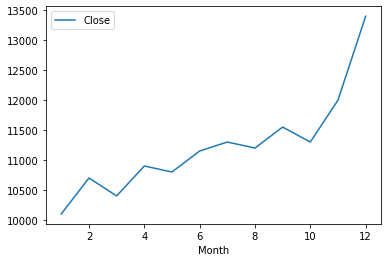

In [162]:
df_g=df_a[['Close']]
df_g.plot()

In [170]:
# df_r = df_a.reset_index()
# df_r
df_a=df_r.set_index('index')
df_a

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06
2019-06-01 00:00:00+09:00,6,11150,11400,11450,11000,55519,2018,2018-06
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06


In [175]:
df_sorted=df_a.sort_index(ascending=False)
df_sorted

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-06-01 00:00:00+09:00,6,11150,11400,11450,11000,55519,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06


In [176]:
df_sorted=df_a.sort_values(by='Volume',ascending=False)
df_sorted

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-07-01 00:00:00+09:00,7,11300,11250,11450,10750,134805,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06


In [18]:
### Period 배열

In [184]:
# Period 배열
pr_m = pd.period_range(start='2019-01-01',
                      end=None,
                      periods=3, 
                      freq='M')#월
print(pr_m)
pr_h = pd.period_range(start='2019-01-01',
                      end=None,
                      periods=3, 
                      freq='H')#시간
pr_h

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')

python, numpy, pands 날짜 타입 비교 및 정리

https://ellun.tistory.com/320

## 시간 데이터 변환

In [209]:
#timestamp -> str변환
import time
today=time.time()
print(today,type(today))
s= str(today)
print(s,type(s))

1642396284.3331585 <class 'float'>
1642396284.3331585 <class 'str'>


In [248]:
#datetime -> str
from datetime import datetime
s=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-17 14:14:21 <class 'str'>
2022-01-17 14:14:21 <class 'str'>


In [273]:
#str-> timestamp
from datetime import datetime
import time
s='2022-01-17 14:14:21'
ts=time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
ts

1642396461.0

In [290]:
#str -> datetime   #p -> 파싱 (변환)
s='2022-01-17 14:14:21'
dt=datetime.strptime(s,'%Y-%m-%d %H:%M:%S')

print(dt,type(dt))

2022-01-17 14:14:21 <class 'datetime.datetime'>


In [276]:
# datetime->timestamp
print(datetime.now(),type(datetime.now()))
ts=time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:22:31.673606 <class 'datetime.datetime'>
1642396951.0 <class 'float'>


In [5]:
s = '2022-01-17 14:14:14'
date_time = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(date_time,type(date_time))

str_time = date_time.strftime('%Y-%m-%d %H:%M:%S')
time_stamp = time.mktime(datetime.strptime(str_time,'%Y-%m-%d %H:%M:%S').timetuple())
print(time_stamp,type(time_stamp))

str_time_2 = str(str_time)
date_time_2 = datetime.strptime(str_time_2,'%Y-%m-%d %H:%M:%S')
print(date_time_2,type(date_time_2))


2022-01-17 14:14:14 <class 'datetime.datetime'>
1642396454.0 <class 'float'>
2022-01-17 14:14:14 <class 'datetime.datetime'>


In [ ]:
import datetime, time
# str -> datetime
s = '2013-12-24 13:12:24'
dt = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

# timestamp -> str -> datetime
tm = time.time()
stm = str(tm)
print(stm,type(stm))
dtm = datetime.datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))

# datetime -> str -> timestamp
st = str(dt)
print(st,type(st))
tst = time.mktime(datetime.datetime.strptime(st,'%Y-%m-%d %H:%M:%S').timetuple())
print(tst,type(tst))



In [6]:
# 1)str->datetime 2)timestamp -> str -> datetime, 3)datetime->str->timestamp
#과제
import time
from datetime import datetime
s='2022-01-17'
print(s,type(s))
dt=datetime.strptime(s,'%Y-%m-%d')
print(dt,type(dt))

today=time.time()
print(today,type(today))
today=str(today)
print(today,type(today))
# dt=datetime.strptime(today.timetuple())

s=datetime.now()
print(s,type(s))
s.strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-17 <class 'str'>
2022-01-17 00:00:00 <class 'datetime.datetime'>
1642464572.4777708 <class 'float'>
1642464572.4777708 <class 'str'>
2022-01-18 09:09:32.478768 <class 'datetime.datetime'>
2022-01-18 09:09:32.478768 <class 'datetime.datetime'>


In [25]:
#1)str->datetime 
s = '2022-01-17 14:14:22'   
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt)
# 2)timestamp -> str -> datetime
a = datetime.now()
b = str(a)
c = time.mktime(datetime.strptime(b,'%Y-%m-%d %H:%M:%S.%f').timetuple())
print(c)
# , 3)datetime->str->timestamp
today = time.time()
t=datetime.fromtimestamp(today)
print(t,type(t))
s=str(t)

# y = str(today)
z = datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')
print(z)

2022-01-17 14:14:22
1642465403.0
2022-01-18 09:23:23.835636 <class 'datetime.datetime'>
2022-01-18 09:23:23.835636


In [339]:
# 1년전 datetime값
from datetime import *
import time

datetime_now=datetime.now()
delta_datetime=timedelta(days=-365)
print(delta_datetime)
datetime_now+delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 26, 137707)

In [349]:
# 두 날짜간의 일수 구하기
from datetime import *
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [358]:
#특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days=['MON','TUE','WED','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]
get_yoil(2022,1,29)

'SUN'

In [384]:
# 판다스 이용
import pandas as pd
t = pd.Timestamp(1513393335,unit='s',tz='US/Pacific')
print(t,type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [387]:
import time
today=time.time()
today

1642399760.18442

In [388]:
date=pd.Timestamp(1642399760.18442 ,unit='s',tz='Asia/Seoul')
print(date,type(date))

2022-01-17 15:09:20.184420109+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [393]:
pd.to_datetime([1,2,3],unit='D',origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [396]:
pr_m=pd.period_range(start='2019-01-01',
                    end=None,
                    periods=3,
                    freq='10M')
pr_m

PeriodIndex(['2019-01', '2019-11', '2020-09'], dtype='period[10M]')

In [401]:
import numpy as np
sr0=pd.Series(pd.date_range('2021-01-01',periods=10,freq='D'),name='date')
sr1=pd.Series(np.random.randint(1000,2000,10),name='price')
sr2=pd.Series((np.random.rand(10)*100).round(2),name='profit')
df=pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1284,72.82
1,2021-01-02,1017,87.44
2,2021-01-03,1757,27.85
3,2021-01-04,1951,31.59
4,2021-01-05,1430,11.08


In [412]:
import pandas as pd
df=pd.read_csv('./dataset/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [423]:
#datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 세팅하여 출력하세요
df.Date=pd.to_datetime(df.Date)
display(df.info())
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day
display(df.head())
df.set_index('Year').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
 6   Year    20 non-null     int64         
 7   Month   20 non-null     int64         
 8   Day     20 non-null     int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.5 KB


None

,Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26


,Date,Close,Start,High,Low,Volume,Month,Day
Year,,,,,,,,
2018,2018-07-02,10100,10850,10900,10000,137977,7,2
2018,2018-06-29,10700,10550,10900,9990,170253,6,29
2018,2018-06-28,10400,10900,10950,10150,155769,6,28
2018,2018-06-27,10900,10800,11050,10500,133548,6,27
2018,2018-06-26,10800,10900,11000,10700,63039,6,26


In [3]:
# period 변환후 년월일 표기를 년월으로 인덱스로 세팅하여 출력
import pandas as pd
df=pd.read_csv('./dataset/stock-data.csv')
df.Date=pd.to_datetime(df.Date)
df['Date']=df.Date.dt.to_period(freq='A')

In [87]:
df=pd.read_csv('./dataset/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [88]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 
#반올림하여 출력하세요
def mpg_to_kpl(x):
    return x*1.6090344/3.7854118
df['kpl']=mpg_to_kpl(df.mpg)
df.loc[:2,'kpl']=df.loc[:2,'kpl'].round(2)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.650000
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.380000
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.650000
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.800991
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.226053
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.476672
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.702724
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.601981
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.901734


In [139]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는
#이유 및 float로 처리)
# (hint : np.nan으로 대체)

In [89]:
import numpy as np
df1 = df.copy()
df1.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [99]:
import numpy as np
df1 = df.copy()
df.horsepower = df.horsepower.replace('?',np.nan)
sr1 = pd.to_numeric(df.horsepower, errors = 'coerce')  #숫자제외 변경 자료형도 변경
df['horsepower'] = sr1
df.info()
# print(df1.horsepower.isnull().sum())
# df_sorted = df1.sort_values(by='horsepower',ascending=False)
# df_sorted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    float64
 7   origin        398 non-null    object 
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(8), object(2)
memory usage: 31.2+ KB


In [91]:
import numpy as np
df1.horsepower.unique()  #고유값 확인시 문자'?'가 들어있음

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [141]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 처리 전 후로 비교하세요.

In [92]:
df.horsepower.replace("?", np.nan, inplace=True)   
print(df.horsepower.isnull().sum())
df.dropna(subset=['horsepower'], axis = 0, inplace=True)    
df.horsepower=df.horsepower.astype(float)
print(df.horsepower.isnull().sum())
print(df.dtypes)

6
0
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
kpl             float64
dtype: object


In [143]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.

In [144]:
df.to_pickle("./dataset/auto_df.pkl")

In [93]:
df = pd.read_pickle("./dataset/auto_df.pkl")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,7.651115
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,6.375929
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,7.651115
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,6.800991
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,7.226053


<AxesSubplot:>

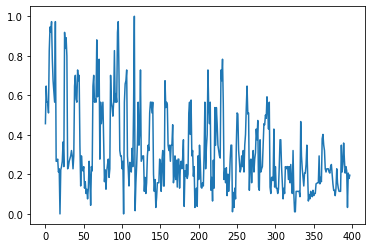

In [71]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.
df.horsepower= df.horsepower/abs(df.horsepower.max())
df.horsepower.plot()

<AxesSubplot:>

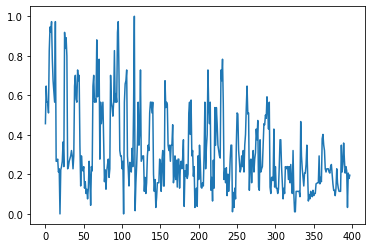

In [70]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 
#최소값을 분모로 계산하여 저장하세요
a=min(df.horsepower)
b=max(df.horsepower)
df.horsepower=df.horsepower.apply(lambda x:(x-a)/(b-a))
df.horsepower.head()
df.horsepower.plot()

In [147]:
# [과제] origin열의 고유값을 출력하세요
df.origin.unique()
df.value_counts('origin')

origin
1.0    245
3.0     79
2.0     68
dtype: int64

In [94]:
df['origin'].replace({1:'USA',2:'EU',3:'JAPAN'},inplace=True)


In [133]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')

In [22]:
# df['origin'] = df['origin'].astype('str')
df.origin[df['origin']== 1] ='USA'
df.origin[df['origin']== 2] ='EU'
df.origin[df['origin']== 3] ='JAPAN'
df.value_counts('origin')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


C:\Users\qkrrh\AppData\Local\Temp/ipykernel_1604/3790960409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.origin[df['origin']== 1] ='USA'
C:\Users\qkrrh\AppData\Local\Temp/ipykernel_1604/3790960409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.origin[df['origin']== 2] ='EU'
C:\Users\qkrrh\AppData\Local\Temp/ipykernel_1604/3790960409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.origin[df['origin']== 3] ='JAPA

In [155]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.
df['origin'] = df['origin'].astype('category')
print(df['origin'].dtype)

category


In [95]:
# [과제] origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtype)

object


In [ ]:
# [과제] hrosepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔

In [118]:
df1.horsepower.unique()
df1.dropna(subset=['horsepower'], axis = 0, inplace=True) 
df1.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

### np.hisrogram

In [124]:
import numpy as np
count, bins_divders = np.histogram(df1.horsepower, bins=3)
print(count, bin_dividers)
bin_names = ['저출력','보통출력','고출력']
df1['hp_bin'] = pd.cut(x = df1.horsepower, #데이터배열
                     bins = bins_divders,  #경계값 리스트
                     labels = bin_names,  #bin이름
                     include_lowest = True) #첫 경계값 포함
df1.head(10)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,hp_bin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu,7.651115,보통출력
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320,6.375929,보통출력
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite,7.651115,보통출력
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst,6.800991,보통출력
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino,7.226053,보통출력
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,USA,ford galaxie 500,6.375929,고출력
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,USA,chevrolet impala,5.950867,고출력
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,USA,plymouth fury iii,5.950867,고출력
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,USA,pontiac catalina,5.950867,고출력
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,amc ambassador dpl,6.375929,고출력


(array([ 27.,  95., 120.,  44.,  20.,  46.,  13.,  14.,   5.,   8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

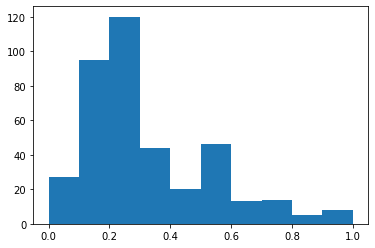

In [78]:
import matplotlib.pyplot as plt
np.histogram(df.horsepower)
plt.hist(df.horsepower)

In [123]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후
# 통계요약표를 출력하세요
df['horsepower_1'] = df['horsepower']/abs(df['horsepower'].max())
df[['horsepower_1']].describe()


,horsepower_1
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000
